# This Notebook is intend to implement the function for Reshaping the dataset

In [2]:
import pandas as pd
import numpy as np
import import_ipynb
import matplotlib.pyplot as plt
import CDCwire
import sys
sys.path.append("..")
import BelleII

In [75]:

def BelleII_convert_to_MegaData(
    
    # hits and vertex data path
    hits_path = "",
    vertexs_path = "",
    output_path = "",
    
    # Ilayer and Iwire in names
    Ilayer_label_in_header = "iCLayer ID",
    Iwire_label_in_header = "iWire ID",
    
    # Vertex_x and vertex_y label names
    vertex_x_label_in_header = "vertex x",
    vertex_y_label_in_header = "vertex y"
):
    
    hits_df = pd.read_csv(hits_path)
    vertexs_df = pd.read_csv(vertexs_path)
    valid_event_list = np.unique(hits_df.event.to_numpy())
    #print(valid_event_list)
    #print(len(valid_event_list))
    all_sample = np.zeros((len(valid_event_list),14336+5))
    sample_processed = 0
    for event_idx in valid_event_list:
        
        # Slice that eventID dataframe
        hits_event_df = hits_df[hits_df.event== event_idx]
        vertexs_event_df = vertexs_df[vertexs_df.event == event_idx]
        
        #################### process hits information ####################
        
        # Slice Ilayer and IWire
        hitted_Layer_Wire = hits_event_df[[Ilayer_label_in_header,Iwire_label_in_header]].to_numpy()
        
        # hold temp hits information
        temp = np.zeros(14336)
        for Ilayers,Iwires in hitted_Layer_Wire:
            temp[CDCwire.BelleCdcWire._calculateUniqueId(Ilayers,Iwires)] = int(1)
        temp = temp.astype(np.int8)
        
        #################### process vertex information ##################
        
        #Slice to the form of [[vertex_X,vertex_y]]
        vertex_np = vertexs_event_df[[vertex_x_label_in_header,vertex_y_label_in_header]].to_numpy()
        
        
        temp_v = np.zeros(5)
        x = vertex_np[0][0]
        y = vertex_np[0][1]
        
        temp_v[0] = x 
        temp_v[1] = y
        temp_v[2] = (x**2+y**2)**0.5 
        temp_v[3] = np.arctan2(y,x) * 180/ np.pi
        temp_v[4] = event_idx
        all_sample[sample_processed][:-5] = temp
        all_sample[sample_processed][-5:] = temp_v
        
        sample_processed += 1
    np.savetxt(output_path,all_sample,fmt='%s',header=give_csv_header(wireID_range = 14336,output_type = "all"),delimiter="," )


In [79]:
BelleII_convert_to_MegaData(hits_path = BelleII._get_data_path(which_data="clear hit vertex")[0][0],
                           vertexs_path= BelleII._get_data_path(which_data="clear hit vertex")[1][0],
                           output_path="m20.csv")
BelleII_convert_to_MegaData(hits_path = BelleII._get_data_path(which_data="clear hit vertex")[0][1],
                           vertexs_path= BelleII._get_data_path(which_data="clear hit vertex")[1][1],
                           output_path="m21.csv")
BelleII_convert_to_MegaData(hits_path = BelleII._get_data_path(which_data="clear hit vertex")[0][2],
                           vertexs_path= BelleII._get_data_path(which_data="clear hit vertex")[1][2],
                           output_path="m22.csv")
BelleII_convert_to_MegaData(hits_path = BelleII._get_data_path(which_data="clear hit vertex")[0][3],
                           vertexs_path= BelleII._get_data_path(which_data="clear hit vertex")[1][3],
                           output_path="m23.csv")

In [77]:
df_fuck = pd.read_csv("m20.csv")
print(df_fuck
     )

       # wire0  wire1  wire2  wire3  wire4  wire5  wire6  wire7  wire8  wire9  \
0          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
11374      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
11375      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
11376      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
11377      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
11378      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...  wire14331  wire

In [74]:
hits = pd.read_csv(BelleII_get_data_path(which_data="clear hit vertex")[0][0])
event_id = np.random.randint(1,10000)
print(f"eventid:{event_id}")
print(hits[hits.event==event_id])

print(f"original data----------------------")
######  exam the original data
hits = hits[hits.event == event_id]
hits = hits[["iCLayer ID","iWire ID"]].to_numpy()
hitted_wireid = []
for layer,wire in hits:
    hitted_wireid.append(CDCwire.BelleCdcWire._calculateUniqueId(layer,wire))
print(hitted_wireid)
##### exam the process shit
print(f"processed data----------------------")
processed_hits = pd.read_csv("fuck.txt")
processed_hits = processed_hits[processed_hits.event == event_id]
processed_hits = processed_hits.to_numpy()
processed_vertex_xy = processed_hits[0][-5:-3]
processed_hits = processed_hits[0][:14336]
mask = np.where(processed_hits == 1)
print(mask[0])
print(f"vertex_x_y is :{processed_vertex_xy}")



eventid:5656
        Unnamed: 0  event  iCLayer ID  iWire ID      x       y sl_type  type
340761      340761   5656          39       221 -29.14  -76.67   axial  muon
340762      340762   5656          39       222 -27.63  -77.23   axial  muon
340763      340763   5656          39       223 -26.10  -77.75   axial  muon
340764      340764   5656          39       224 -24.57  -78.25   axial  muon
340765      340765   5656          39       225 -23.03  -78.72   axial  muon
340766      340766   5656          40       216 -38.06  -74.70   axial  muon
340767      340767   5656          40       217 -36.59  -75.44   axial  muon
340768      340768   5656          40       218 -35.10  -76.14   axial  muon
340769      340769   5656          40       219 -33.60  -76.81   axial  muon
340770      340770   5656          40       220 -32.08  -77.46   axial  muon
340771      340771   5656          40       221 -30.55  -78.07   axial  muon
340772      340772   5656          40       222 -29.02  -78.66 

In [128]:
def BelleII_plot_cross_section(
    layers = [0,1,2,3,4,5,6,7,8]
):
    Super_Layer_marker = {0:"+",1:".",2:"+",3:".",4:"+",5:".",6:"+",7:".",8:"+"}
    
    df = pd.read_csv("cdcwire_config.txt")
    df = df[["superlayer","x","y"]]
    for layer in layers:
        temp = df[(df["superlayer"] == layer)]   
        temp1 = temp.x.to_numpy()
        #print(temp1)
        plt.plot(temp.x,temp.y,Super_Layer_marker[layer],markersize=2)   

[16.7989859  16.77294594 16.72104806 ... 23.63739656 23.72880518
 23.78362581]
[ 25.14233043  25.00018881  24.81949992  24.6005461   24.34365897
  24.04923871  23.71773898  23.34967026  22.94560031  22.506153
  22.0320047   21.52388691  20.98258346  20.40892817  19.80380549
  19.16815171  18.50294275  17.80920725  17.08801244  16.34047299
  15.56773892  14.77100387  13.95149584  13.11047859  12.24924818
  11.36913379  10.4714904    9.55770404   8.62918325   7.68735945
   6.7336851    5.76963125   4.79668286   3.81634173   2.83011878
   1.83953442   0.8461169   -0.14860312  -1.14309069  -2.13581322
  -3.12523965  -4.10984455  -5.08810966  -6.05852697  -7.01959916
  -7.96984535  -8.90780073  -9.83201687 -10.7410712  -11.63356097
 -12.50810973 -13.36336921 -14.19802188 -15.01077826 -15.80038893
 -16.56563295 -17.30533132 -18.01834382 -18.70357136 -19.35995841
 -19.98648817 -20.58220098 -21.14617415 -21.67753968 -22.17547781
 -22.63922002 -23.06805373 -23.46131443 -23.81839909 -24.13875349

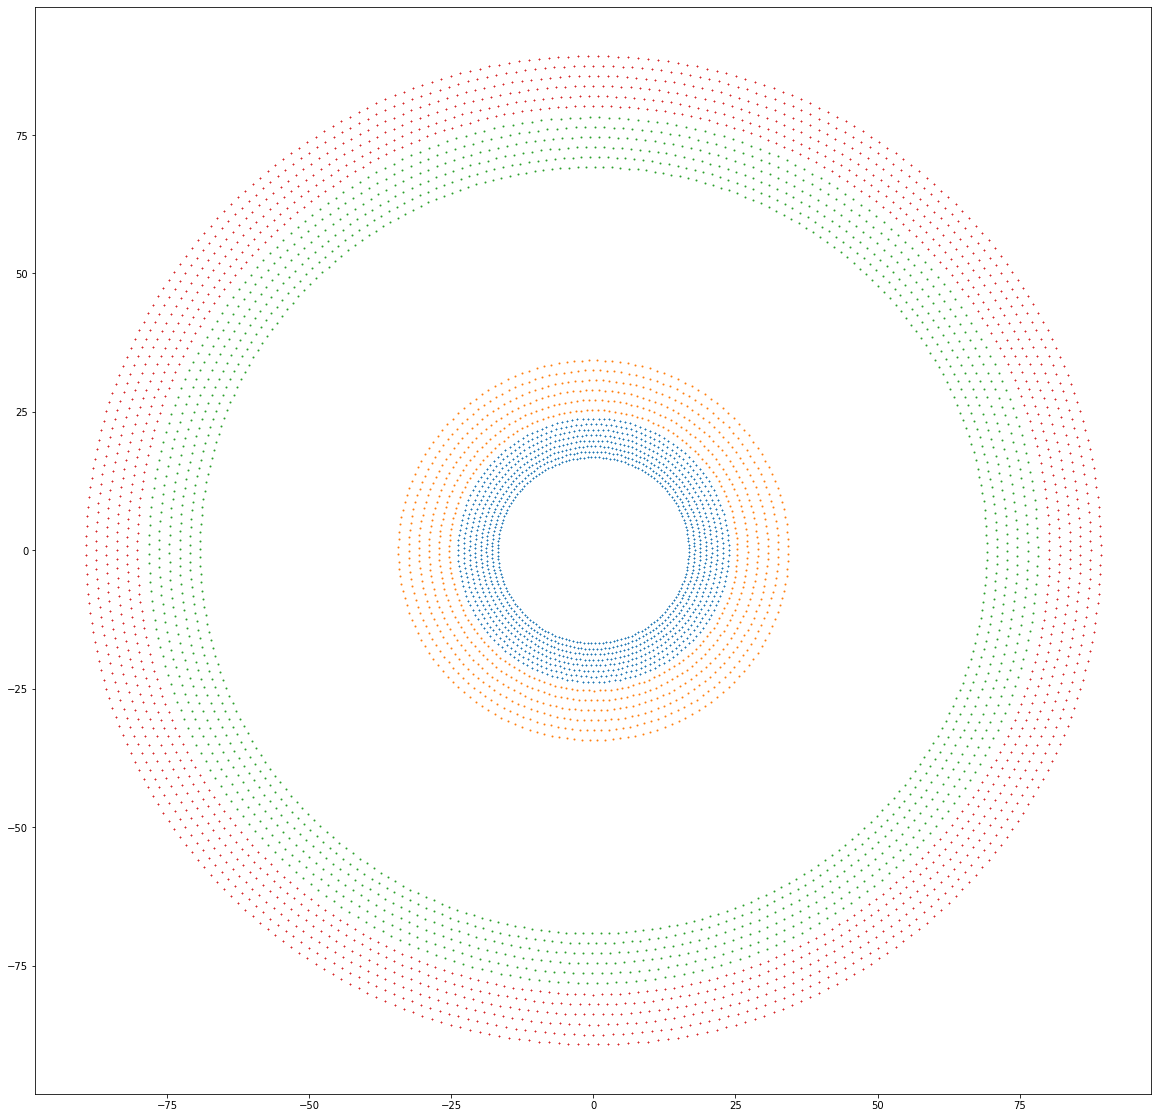

In [129]:
plt.figure(figsize=(20,20))
BelleII_plot_cross_section(layers = [0,1,5,6])
plt.show()


In [58]:
df = pd.read_csv(BelleII_get_data_path(
        workplace="home pc",
        which_data = "coordinate translation"))
temp = df[(df["superlayer id"] == 1)]
temp.add(0)
print(temp)

      superlayer id  ilayer id  iclayer id  azimuthal id           x  \
1280              1          0           8             0  251.423304   
1281              1          0           8             1  250.001888   
1282              1          0           8             2  248.194999   
1283              1          0           8             3  246.005461   
1284              1          0           8             4  243.436590   
...             ...        ...         ...           ...         ...   
2235              1          5          13           155  342.585695   
2236              1          5          13           156  343.108673   
2237              1          5          13           157  343.102629   
2238              1          5          13           158  342.567555   
2239              1          5          13           159  341.504281   

              y  
1280  31.111040  
1281  40.957172  
1282  50.739909  
1283  60.444164  
1284  70.054975  
...         ...  
2235 -20.

# Convert to mega data

## the header is like:
### wire_id(0 ~ 14335), IC_layer(0 ~ 55), Iwire, super_layer_id(0 ~ 8), I_layer(0 ~ 7, 0 ~ 5), x, y

In [39]:
# open this shit
df = pd.read_csv(BelleII_get_data_path(
        workplace="home pc",
        which_data = "coordinate translation"))
df = df[["iclayer id","azimuthal id","superlayer id","ilayer id","x","y"]]
#             0            1             2               3        4   5
# Loop all Superlayers
sample = []
for wire_id in range(14336):
    Ilayers,Iwires = CDCwire.BelleCdcWire._calculateLayerWire(wire_id)
    temp = df[(df["iclayer id"]==Ilayers)&(df["azimuthal id"]==Iwires)]
    temp = temp.to_numpy()
    #print(temp.shape)
    temp = temp.reshape(temp.shape[-1])
    #print(f"{temp}")
    sample.append([int(wire_id),int(temp[0]),int(temp[1]),int(temp[2]),int(temp[3]),temp[4]/10,temp[5]/10])
sample = np.array(sample)
np.savetxt("cdc_wire_infor.txt",sample,fmt='%s',header="wire,iclayer,iwire,superlayer,ilayer,x,y",delimiter="," )

In [79]:
df = pd.read_csv("cdcwire_config.txt")
print(df)

        # wire  iclayer  iwire  superlayer  ilayer           x         y
0          0.0      0.0    0.0         0.0     0.0   16.798986  0.315282
1          1.0      0.0    1.0         0.0     0.0   16.772946  0.974460
2          2.0      0.0    2.0         0.0     0.0   16.721048  1.632107
3          3.0      0.0    3.0         0.0     0.0   16.643372  2.287210
4          4.0      0.0    4.0         0.0     0.0   16.540036  2.938759
...        ...      ...    ...         ...     ...         ...       ...
14331  14331.0     55.0  379.0         8.0     5.0  110.839133 -8.171484
14332  14332.0     55.0  380.0         8.0     5.0  110.957738 -6.361352
14333  14333.0     55.0  381.0         8.0     5.0  111.046968 -4.545040
14334  14334.0     55.0  382.0         8.0     5.0  111.106468 -2.727511
14335  14335.0     55.0  383.0         8.0     5.0  111.136221 -0.909251

[14336 rows x 7 columns]


In [87]:
def BelleII_give_wire_xy_pos():
    df = pd.read_csv("cdcwire_config.txt")
    df = df[["x","y"]]
    temp = df.to_numpy()
    return temp
    

14336


In [61]:
df_fuck = pd.read_csv(BelleII_get_data_path(which_data="mega data")[0])
print(df_fuck)

       # wire0  wire1  wire2  wire3  wire4  wire5  wire6  wire7  wire8  wire9  \
0          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
11374      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
11375      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
11376      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
11377      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
11378      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...  wire14331  wire

In [62]:
print(len(df_fuck))

11379


In [88]:
random_index = np.random.randint(0,len(df_fuck))
print(random_index)
temp = df_fuck.loc[random_index]
temp = temp.to_numpy()
print(temp)

4401
[   0.            0.            0.         ...   17.96641867  103.22408552
 5810.        ]


In [89]:

    
df = pd.read_csv(BelleII_get_data_path(workplace="home pc",which_data="mega data")[0])

random_index = np.random.randint(0,len(df))
print(random_index,"\n")
temp = df.loc[random_index]
print(temp)


3118 

# wire0          0.000000
wire1            0.000000
wire2            0.000000
wire3            0.000000
wire4            0.000000
                 ...     
vertex_x       -13.550000
vertex_y        46.770000
vertex_r        48.693279
vertex_phi     106.157129
event         4141.000000
Name: 3118, Length: 14341, dtype: float64


In [92]:
temp_np = temp.to_numpy()
print(temp_np)
print(len(temp_np))

[   0.            0.            0.         ...   48.6932788   106.15712861
 4141.        ]
14341


In [93]:
temp_np = temp_np[:14336]

In [103]:
mask = np.where(temp_np == 1)
print(mask)

(array([ 1473,  1474,  1635,  1795,  1956,  1957,  2116,  2117,  2293,
        2485,  2678,  2870,  3063,  3255,  3462,  3686,  3910,  4134,
        4358,  4582,  4812,  5067,  5324,  5579,  5836,  6091,  6353,
        6640,  6929,  7216,  7505,  7792,  8095,  8415,  8735,  9055,
        9375,  9695, 10382, 10735, 11086, 11439, 11790, 11791, 12147,
       12530, 12915, 13683, 14067], dtype=int64),)


In [105]:
print(mask[0])

[ 1473  1474  1635  1795  1956  1957  2116  2117  2293  2485  2678  2870
  3063  3255  3462  3686  3910  4134  4358  4582  4812  5067  5324  5579
  5836  6091  6353  6640  6929  7216  7505  7792  8095  8415  8735  9055
  9375  9695 10382 10735 11086 11439 11790 11791 12147 12530 12915 13683
 14067]


[16.7989859  16.77294594 16.72104806 ... 23.63739656 23.72880518
 23.78362581]
[ 25.14233043  25.00018881  24.81949992  24.6005461   24.34365897
  24.04923871  23.71773898  23.34967026  22.94560031  22.506153
  22.0320047   21.52388691  20.98258346  20.40892817  19.80380549
  19.16815171  18.50294275  17.80920725  17.08801244  16.34047299
  15.56773892  14.77100387  13.95149584  13.11047859  12.24924818
  11.36913379  10.4714904    9.55770404   8.62918325   7.68735945
   6.7336851    5.76963125   4.79668286   3.81634173   2.83011878
   1.83953442   0.8461169   -0.14860312  -1.14309069  -2.13581322
  -3.12523965  -4.10984455  -5.08810966  -6.05852697  -7.01959916
  -7.96984535  -8.90780073  -9.83201687 -10.7410712  -11.63356097
 -12.50810973 -13.36336921 -14.19802188 -15.01077826 -15.80038893
 -16.56563295 -17.30533132 -18.01834382 -18.70357136 -19.35995841
 -19.98648817 -20.58220098 -21.14617415 -21.67753968 -22.17547781
 -22.63922002 -23.06805373 -23.46131443 -23.81839909 -24.13875349

[80.25389469 80.23837369 80.19193075 ... 89.14272802 89.21147612
 89.24582328]
[90.92494267 90.99937753 91.04481606 ... 99.53021643 99.69243224
 99.8228976 ]
[102.09004851 102.07633209 102.03528718 ... 111.04696783 111.10646757
 111.13622143]


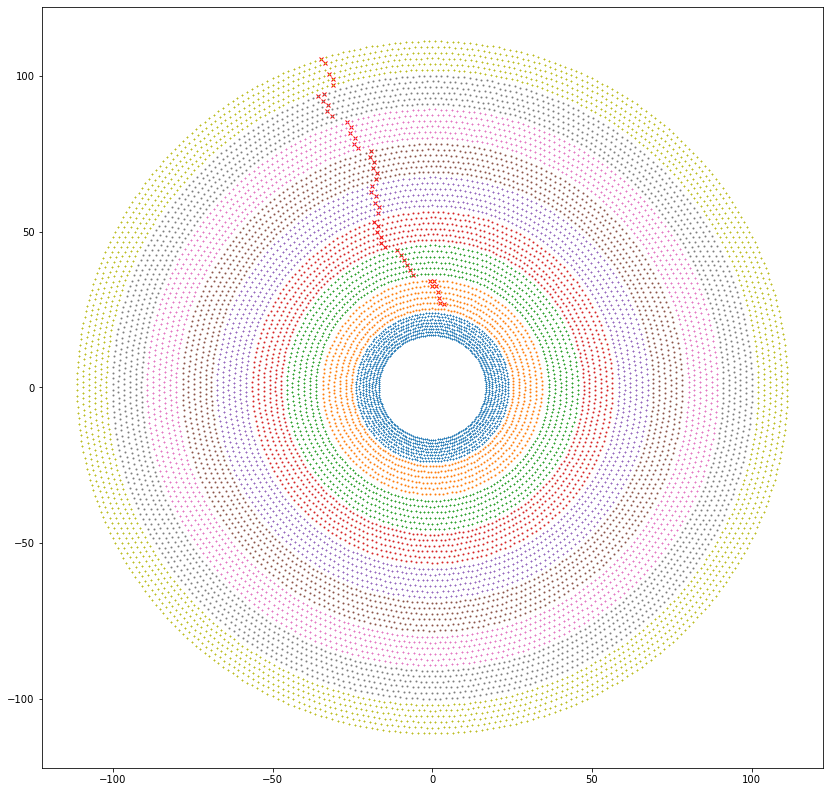

In [134]:
def BelleII_plot_event_from_wireid(
    wireid_list           # must pass in a 1d arrary 
):
    lut = BelleII_give_wire_xy_pos()
    
    temp_xy = np.zeros((len(wireid_list),2))
    for idx,wireid in enumerate(wireid_list):
        temp_xy[idx] = lut[wireid]
    plt.plot(temp_xy[:,0],temp_xy[:,1],"x",markersize=4,color = "red")
    
plt.figure(figsize=(14,14))
BelleII_plot_event_from_wireid(wireid_list=mask[0])
BelleII_plot_cross_section()
plt.show()